## Imports and config

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import partridge as ptg
import matplotlib.pyplot as plt
import altair as alt
import datetime

#from gtfs_utils import *

alt.renderers.enable('notebook')
#alt.data_transformers.enable('json')

RendererRegistry.enable('notebook')

## ClusterToLine.zip --> cluster_to_line_df

In [3]:
CLUSTER_TO_LINE = 'data/archive/2018-07-26/ClusterToLine.zip'

def get_cluster_to_line_df(path):
    cols = ['agency_name', 'route_id', 'route_short_name', 
            'cluster_name', 'from_date', 'to_date', 'cluster_id', 
            'route_type', 'route_type_desc', 'cluster_sub_desc', 'EXTRA']
    ctl = (pd.read_csv(path, encoding='windows-1255', 
                      skiprows=[0], header=None, names = cols)
           .drop(columns=['EXTRA']))
    return ctl

ctl = get_cluster_to_line_df(CLUSTER_TO_LINE)
ctl.head()

,agency_name,route_id,route_short_name,cluster_name,from_date,to_date,cluster_id,route_type,route_type_desc,cluster_sub_desc
0,אגד,10005,5,חיפה עירוני,01/01/2012,01/01/2200,81,1,עירוני,NaN
1,אגד,10006,6,חיפה עירוני,01/01/2012,01/01/2200,81,1,עירוני,NaN
2,אגד,10007,7,חיפה עירוני,01/01/2012,01/01/2200,81,1,עירוני,NaN
3,אגד,10010,10,חיפה עירוני,01/01/2012,01/01/2200,81,1,עירוני,NaN
4,אגד,10011,11,חיפה עירוני,01/01/2012,01/01/2200,81,1,עירוני,NaN


In [22]:
ctl[ctl.cluster_name.str.startswith('שרון')]

,agency_name,route_id,route_short_name,cluster_name,from_date,to_date,cluster_id,route_type,route_type_desc,cluster_sub_desc
161,אגד,10502,502,שרון חולון מרחבי,01/01/2012,01/01/2200,117,3,בינעירוני,NaN
162,אגד,10504,504,שרון חולון מרחבי,01/01/2012,01/01/2200,117,3,בינעירוני,NaN
165,אגד,10521,521,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN
166,אגד,10524,524,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN
167,אגד,10525,525,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN
168,אגד,10531,531,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN
169,אגד,10532,532,שרון חולון מרחבי,01/01/2012,01/01/2200,117,3,בינעירוני,NaN
177,אגד,10551,551,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN
179,אגד,10553,553,שרון חולון מרחבי,01/01/2012,01/01/2200,117,3,בינעירוני,NaN
186,אגד,10561,561,שרון חולון מרחבי,01/01/2012,01/01/2200,117,1,עירוני,NaN


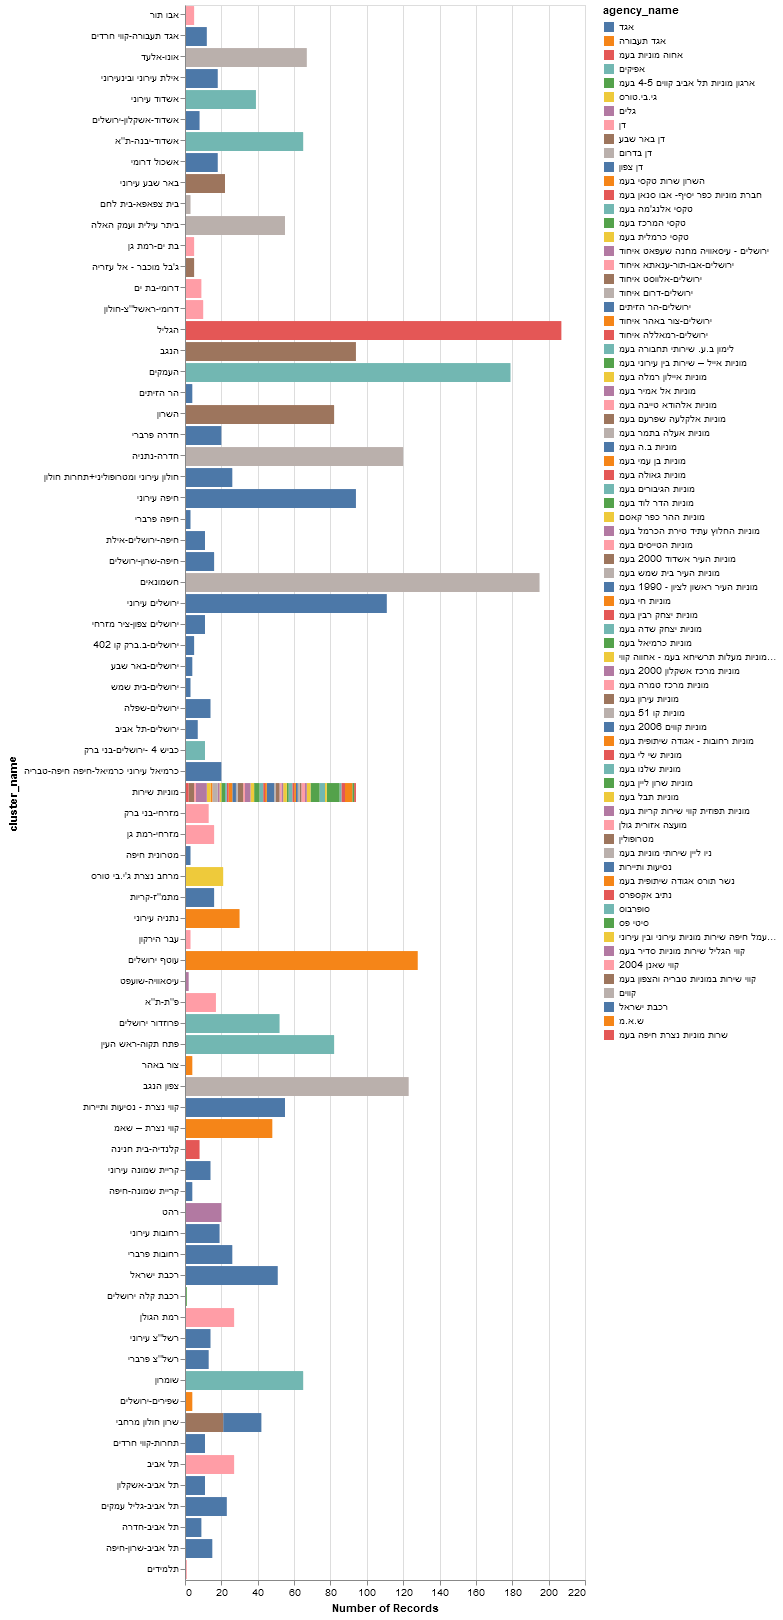

In [21]:
alt.Chart(ctl).mark_bar().encode(
    y='cluster_name',
    x='count()',
    color='agency_name',
    tooltip=['agency_name']
)

In [7]:
ctl.cluster_sub_desc.value_counts(dropna=False)

NaN                     1693
מודיעין עילית             90
חדרה                      77
יקנעם                     64
טבריה                     62
צפת                       62
עפולה                     53
רמלה                      50
ביתר עילית                45
נתניה                     43
גוש עציון                 42
נהריה                     40
בקעת אונו                 39
מטה בנימין                37
בית שמש                   37
מודיעין                   36
כרמיאל-משגב               32
אלעד                      28
מעלות                     26
מעלה אדומים               25
מבשרת ציון וגבעת זאב      24
עכו                       23
שפרעם                     20
לוד                       19
פרוזדור ירושלים           14
עמק האלה                   9
Name: cluster_sub_desc, dtype: int64

## TrainOfficeLineId.zip --> train_office_line_id_df

In [34]:
TRAIN_OLID = 'data/archive/2018-07-26/TrainOfficeLineId.zip'

def get_train_office_line_id_df(path):
    cols = ['office_line_id', 'operator_line_id', 'direction', 'line_alternative', 'train_office_line_id', 'line_detail_record_id', 'from_date', 'to_date', 'trip_id', 'EXTRA']
    tolid = (pd.read_csv(path, encoding='windows-1255', 
                      skiprows=[0], header=None, names = cols)
           .drop(columns=['EXTRA']))
    return tolid

tolid = get_train_office_line_id_df(TRAIN_OLID)
tolid.head()

,office_line_id,operator_line_id,direction,line_alternative,train_office_line_id,line_detail_record_id,from_date,to_date,trip_id
0,13117,117,2,9,982,22090,25/07/2018 00:00:00,25/07/2018 00:00:00,33850812
1,13117,117,2,9,982,22090,26/07/2018 00:00:00,26/07/2018 00:00:00,33851974
2,13117,117,2,9,982,22090,28/07/2018 00:00:00,01/01/2200 00:00:00,30930604
3,13117,117,2,9,982,22090,28/07/2018 00:00:00,01/01/2200 00:00:00,30930605
4,13117,117,2,9,982,22090,28/07/2018 00:00:00,01/01/2200 00:00:00,30930606


## Creating a `partridge` feed
We have a util function for getting a `partridge` feed object by date.  

In [22]:
feed = get_partridge_feed_by_date(LOCAL_GTFS_ZIP_PATH, datetime.date.today())
type(feed)

partridge.gtfs.feed

* *Another option would be to use `ptg.get_representative_feed()` which finds the busiest day of the gtfs file and returns a feed for that day. Not showing this here.*

The feed has in it all the (standard) files in the original GTFS zip, as [pandas](https://github.com/pandas-dev/pandas) DataFrames.

In [23]:
[x for x in dir(feed) if not x.startswith('_')]

['agency',
 'calendar',
 'calendar_dates',
 'config',
 'fare_attributes',
 'fare_rules',
 'feed_info',
 'frequencies',
 'get',
 'is_dir',
 'path',
 'read_file_chunks',
 'routes',
 'shapes',
 'stop_times',
 'stops',
 'transfers',
 'trips',
 'view',
 'zmap']

Figuring out geographical zones requires using another zip file on MoT's FTP, using `get_zones_df()`. Which returns a simple mapping `stop_code` -> (Hebrew) `zone_name` in a DataFrame as well.

In [24]:
zones = get_zones_df(LOCAL_TARIFF_PATH)
zones.head()

,stop_code,zone_name
0,2716,סובב ירושלים
1,2718,סובב ירושלים
2,2720,סובב ירושלים
3,2721,סובב ירושלים
4,2747,סובב ירושלים


## Tidy DataFrame
A (monstrous) merged DataFrame for fancy analysis can be got using `get_tidy_feed_df()`, whom you pass a partridge feed and extra dataframes you want to merge to it (only `zones` is used here).

This takes a few minutes (MoT's GTFS is big)

In [25]:
f = get_tidy_feed_df(feed, [zones])

and what you get is this:

In [26]:
f.head()

,trip_id,departure_time,arrival_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,stop_code,route_id,direction_id,route_short_name,route_long_name,agency_id,agency_name,zone_name
0,32184517_040618,21:36:00,21:36:00,37318,1,ירושלים מלחה,31.747801,35.188216,17078,22786,1,NaN,ירושלים מלחה-ירושלים<->תל אביב מרכז-תל אביב יפו,2,רכבת ישראל,סובב ירושלים
1,32184517_040618,22:19:00,22:19:00,37322,2,בית שמש,31.757821,34.989515,17074,22786,1,NaN,ירושלים מלחה-ירושלים<->תל אביב מרכז-תל אביב יפו,2,רכבת ישראל,אזור בית שמש
2,32184517_040618,22:41:00,22:41:00,37336,3,רמלה,31.928809,34.877304,17060,22786,1,NaN,ירושלים מלחה-ירושלים<->תל אביב מרכז-תל אביב יפו,2,רכבת ישראל,גוש דן
3,32184517_040618,22:45:00,22:45:00,37338,4,לוד,31.945234,34.875081,17058,22786,1,NaN,ירושלים מלחה-ירושלים<->תל אביב מרכז-תל אביב יפו,2,רכבת ישראל,גוש דן
4,32184517_040618,22:51:00,22:51:00,37334,5,לוד-גני אביב,31.966977,34.878790,17062,22786,1,NaN,ירושלים מלחה-ירושלים<->תל אביב מרכז-תל אביב יפו,2,רכבת ישראל,גוש דן


In the future I intend to make this more customizable (field selection, transformations and more). 

In [27]:
f.shape

(3151606, 16)

In [28]:
feed.stop_times.shape

(3151606, 8)

So we truly have all the stop times for one whole day of trips.

## Random examples

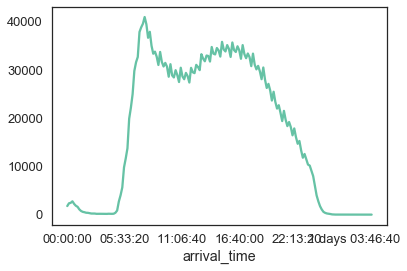

In [29]:
f.set_index('arrival_time').resample('10T').size().plot()

In [78]:
zone_counts = (f.set_index('arrival_time')
               .groupby([pd.Grouper(freq='10T'), 'zone_name'])
               .size().reset_index()
               .rename(columns={0: 'trips'})
               .assign(time = lambda x: pd.DatetimeIndex(x.arrival_time+datetime.date.today()))
              )

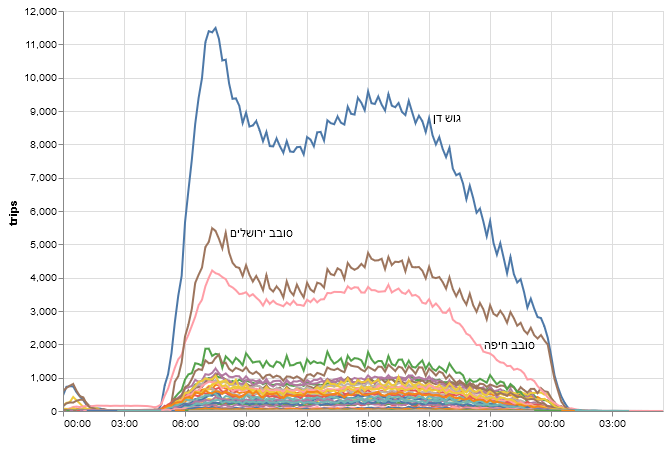

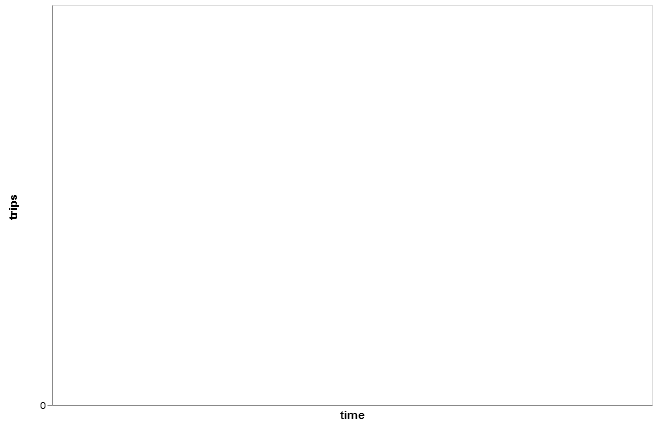

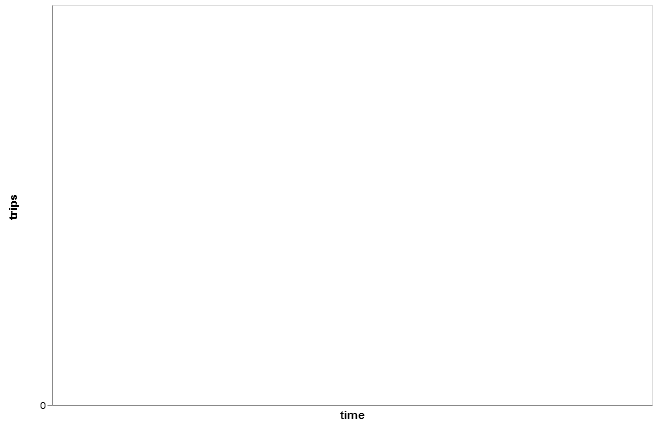

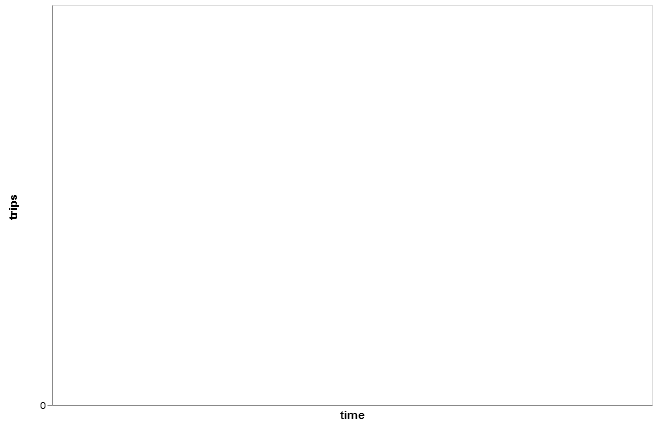

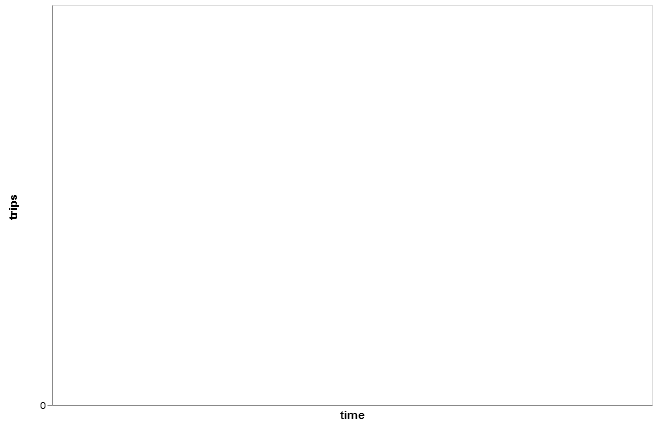

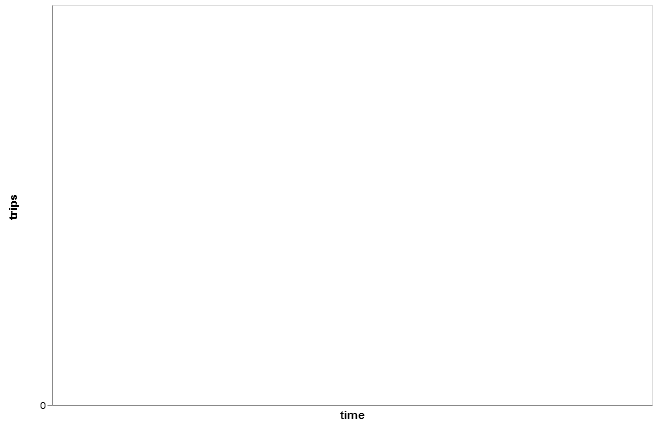

In [103]:
lines = alt.Chart(zone_counts).mark_line().encode(
    x = alt.X('time:T', axis=alt.Axis(format='%H:%M')),
    y = 'trips',
    color = alt.Color('zone_name', legend=None),
    tooltip = 'zone_name'
).interactive()

annotation = alt.Chart(zone_counts).mark_text(
    align='left',
    baseline='middle',
    fontSize = 12,
    dx = 4
).encode(
    x='time:T',
    y='trips',
    text='zone_name'
).transform_filter(
    ((alt.datum.trips==8785) | (alt.datum.trips == 5347) | (alt.datum.trips == 1985)) 
)

(lines + annotation).properties(height=400, width=600)